<a href="https://colab.research.google.com/github/BuddhikaRoshan/HemoAi/blob/Sonali/Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 1. Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Load model
# ============================
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

model = load_model("/content/drive/MyDrive/Research/malaria_model_cnn_vit (1).keras")

In [11]:
# Helper function
# ============================
def predict_and_visualize(img_path, model, classes=["Parasitized", "Uninfected"]):
    # Load and preprocess
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Prediction
    pred = model.predict(img_array)[0][0]
    percentage = pred * 100

    # Threshold
    predicted_class = classes[1] if pred >= 0.5 else classes[0]

    # Visualization
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class}\nConfidence: {percentage:.2f}%")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


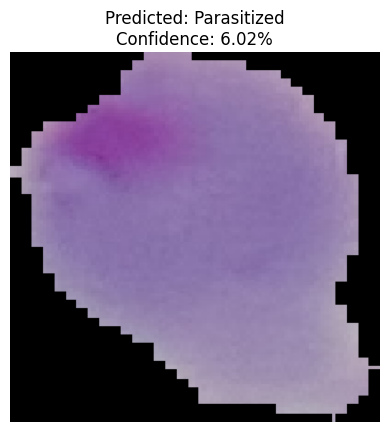

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


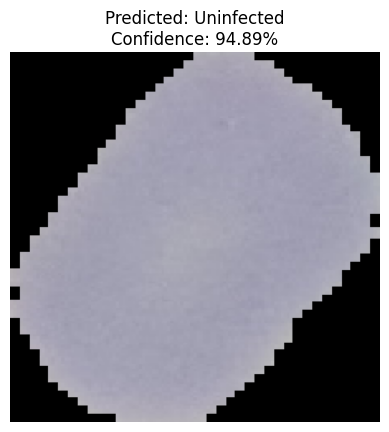

In [13]:
# Test with two images
# ============================
img1 = "/content/drive/MyDrive/Research/para1.png"
img2 = "/content/drive/MyDrive/Research/un2.png"

predict_and_visualize(img1, model)
predict_and_visualize(img2, model)